In [1]:
!pip install mdtraj matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/share/apps/python/3.8.6/intel/bin/python -m pip install --upgrade pip' command.


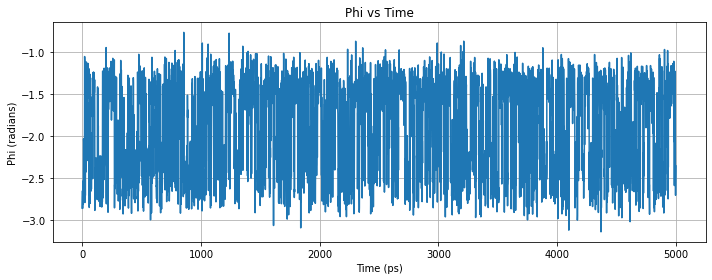

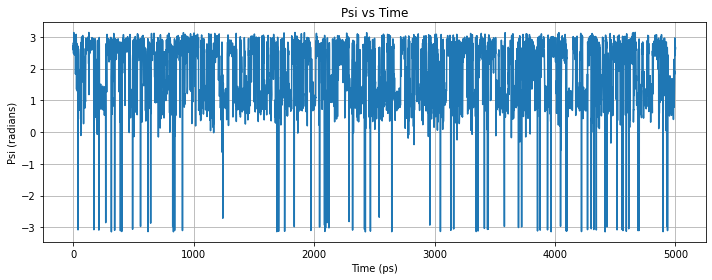

In [5]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Load trajectory
traj = md.load('../Data/adp_md.trr', top='../Data/adp_md.gro')

# Compute phi and psi angles
phi_indices, phi_angles = md.compute_phi(traj)
psi_indices, psi_angles = md.compute_psi(traj)

# Plot phi vs time
plt.figure(figsize=(10, 4))
plt.plot(traj.time, phi_angles[:, 0])
plt.xlabel('Time (ps)')
plt.ylabel('Phi (radians)')
plt.title('Phi vs Time')
plt.grid(True)
plt.tight_layout()
plt.savefig("../Figures/Phi vs Time",format="pdf")
plt.show()

# Plot psi vs time
plt.figure(figsize=(10, 4))
plt.plot(traj.time, psi_angles[:, 0])
plt.xlabel('Time (ps)')
plt.ylabel('Psi (radians)')
plt.title('Psi vs Time')
plt.grid(True)
plt.tight_layout()
plt.savefig("../Figures/Psi vs Time",format="pdf")
plt.show()



<ipython-input-4-db781deccf95>:16: RuntimeWarning: divide by zero encountered in log
  free_energy = -np.log(hist)


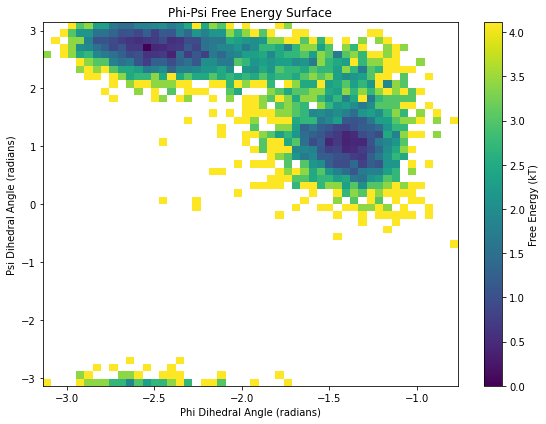

In [4]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Load the trajectory
traj = md.load('../Data/adp_md.trr', top='../Data/adp_md.gro')

# Compute phi and psi angles
phi_indices, phi_angles = md.compute_phi(traj)
psi_indices, psi_angles = md.compute_psi(traj)

# Compute a 2D histogram of the phi and psi data
hist, xedges, yedges = np.histogram2d(phi_angles[:, 0], psi_angles[:, 0], bins=50, density=True)

# Calculate free energy from the histogram
free_energy = -np.log(hist)
free_energy -= np.min(free_energy)

# Plot the free energy surface
plt.figure(figsize=(8,6))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.imshow(free_energy.T, extent=extent, origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='Free Energy (kT)')
plt.xlabel('Phi Dihedral Angle (radians)')
plt.ylabel('Psi Dihedral Angle (radians)')
plt.title('Phi-Psi Free Energy Surface')
plt.tight_layout()
plt.savefig("../Figures/Phi-Psi Free Energy Surface.pdf",format="pdf")
plt.show()
